C:\Users\86181\AppData\Local\Temp\ipykernel_17004\1945000339.py:19: RuntimeWarning: divide by zero encountered in divide
  return 2 * h * nu**3 * c**-2 * (1 / (np.exp(h * nu / (k * T)) - 1))
C:\Users\86181\AppData\Local\Temp\ipykernel_17004\1945000339.py:19: RuntimeWarning: overflow encountered in exp
  return 2 * h * nu**3 * c**-2 * (1 / (np.exp(h * nu / (k * T)) - 1))


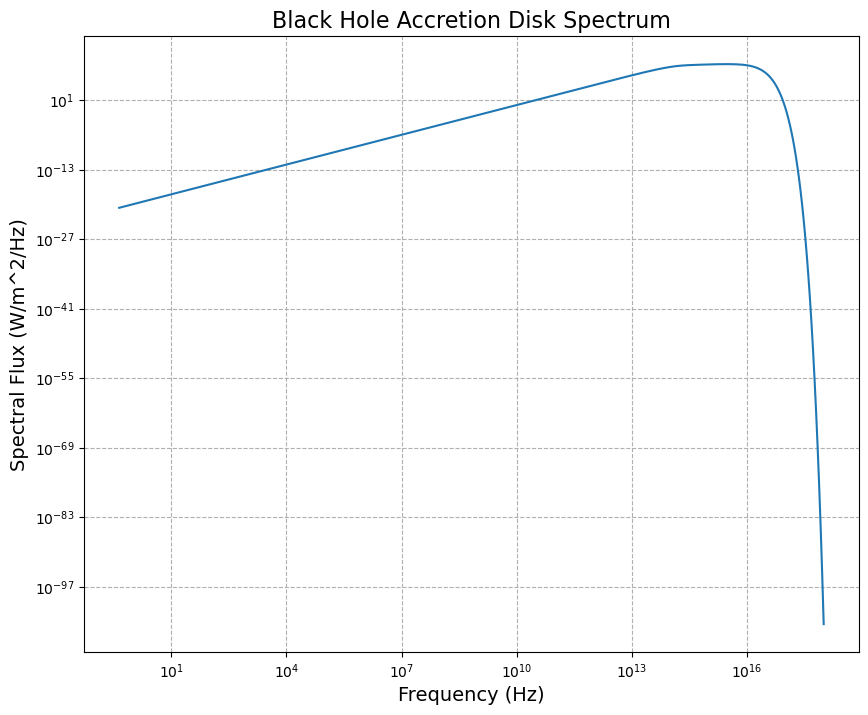

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

h = 6.62607015e-34
c = 3e8
k = 1.380649e-23
sigma = 5.670374419e-8

rin = 1e7
rmax = 1000 * rin
frequencies = np.logspace(-2, 18, 500)

def temperature(r, rin):
    C = 1e50 * sigma * 3 * (1 - (rin / r)**(1/2))
    return (C * r**(-3))**(1/4)

def planck_law(nu, T):
    return 2 * h * nu**3 * c**-2 * (1 / (np.exp(h * nu / (k * T)) - 1))

def compute_spectrum(rin, rmax, frequencies):
    r_vals = np.linspace(rin, rmax, 200000)
    spectrum = np.zeros_like(frequencies)
    
    for r in r_vals:
        T = temperature(r, rin)
        planck_values = planck_law(frequencies, T)
        spectrum += planck_values * 4 * np.pi * r
     
    return spectrum

spectrum = compute_spectrum(rin, rmax, frequencies)

plt.figure(figsize=(10, 8))
plt.loglog(frequencies, spectrum)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Spectral Flux (W/m^2/Hz)', fontsize=14)
plt.title('Black Hole Accretion Disk Spectrum', fontsize=16)
plt.grid(True, which="both", ls="--")
plt.show()